In [1]:
import random
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
from faker import Faker


In [2]:
fake = Faker()

# Function to generate fake data
def generate_fake_data(num_users_per_network, blockchain_names, start_date=None, end_date=None):
    if not start_date:
        start_date = datetime.now() - timedelta(days=30)  # Default start date 30 days ago
    if not end_date:
        end_date = datetime.now()  # Default end date today

    fake_data = {}

    for network in blockchain_names:
        fake_data[network] = {}
        for _ in range(num_users_per_network):
            user_id = fake.user_name()
            fake_data[network][user_id] = []

    current_date = start_date
    while current_date <= end_date:
        for network in blockchain_names:
            for user_id in fake_data[network]:
                reward = random.randint(1, 100)
                fake_data[network][user_id].append({'date': current_date, 'reward': reward})
        current_date += timedelta(days=1)

    return fake_data



In [3]:
blockchain_names = ['Ethereum', 'Bitcoin', 'Tezos']
fake_data = generate_fake_data(num_users_per_network=5, blockchain_names=blockchain_names)

In [4]:
print(fake_data)

{'Ethereum': {'dustin63': [{'date': datetime.datetime(2024, 3, 18, 17, 18, 54, 564222), 'reward': 51}, {'date': datetime.datetime(2024, 3, 19, 17, 18, 54, 564222), 'reward': 29}, {'date': datetime.datetime(2024, 3, 20, 17, 18, 54, 564222), 'reward': 100}, {'date': datetime.datetime(2024, 3, 21, 17, 18, 54, 564222), 'reward': 24}, {'date': datetime.datetime(2024, 3, 22, 17, 18, 54, 564222), 'reward': 79}, {'date': datetime.datetime(2024, 3, 23, 17, 18, 54, 564222), 'reward': 18}, {'date': datetime.datetime(2024, 3, 24, 17, 18, 54, 564222), 'reward': 94}, {'date': datetime.datetime(2024, 3, 25, 17, 18, 54, 564222), 'reward': 5}, {'date': datetime.datetime(2024, 3, 26, 17, 18, 54, 564222), 'reward': 37}, {'date': datetime.datetime(2024, 3, 27, 17, 18, 54, 564222), 'reward': 41}, {'date': datetime.datetime(2024, 3, 28, 17, 18, 54, 564222), 'reward': 20}, {'date': datetime.datetime(2024, 3, 29, 17, 18, 54, 564222), 'reward': 72}, {'date': datetime.datetime(2024, 3, 30, 17, 18, 54, 564222), 

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_daily_rewards(fake_data):
    # Step 1: Aggregate rewards for all users per day and per blockchain
    daily_rewards = {}
    blockchain_totals = {'Total': {}}

    for network, user_rewards in fake_data.items():
        blockchain_totals[network] = {}
        for user_id, rewards in user_rewards.items():
            for reward in rewards:
                date = reward['date'].date()
                reward_value = reward['reward']
                
                # Add to blockchain-specific totals
                if date not in daily_rewards:
                    daily_rewards[date] = {network: 0}
                if network not in daily_rewards[date]:
                    daily_rewards[date][network] = 0
                daily_rewards[date][network] += reward_value
                
                # Add to total sum
                if date not in blockchain_totals['Total']:
                    blockchain_totals['Total'][date] = 0
                blockchain_totals['Total'][date] += reward_value

    # Step 2: Create DataFrames from the aggregated data
    df_blockchain = pd.DataFrame.from_dict(daily_rewards, orient='index')
    df_blockchain.reset_index(inplace=True)
    df_blockchain.rename(columns={'index': 'Date'}, inplace=True)
    df_blockchain['Date'] = pd.to_datetime(df_blockchain['Date'])  # Convert 'Date' column to datetime format
    
    df_total = pd.DataFrame.from_dict(blockchain_totals['Total'], orient='index', columns=['Total Rewards'])
    df_total.reset_index(inplace=True)
    df_total.rename(columns={'index': 'Date'}, inplace=True)
    df_total['Date'] = pd.to_datetime(df_total['Date'])  # Convert 'Date' column to datetime format

    # Step 3: Use Seaborn to plot the daily rewards sum for each blockchain
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot each blockchain with different color
    blockchain_colors = sns.color_palette("bright", len(fake_data))
    for i, (network, color) in enumerate(zip(fake_data.keys(), blockchain_colors)):
        if network != 'Total':
            sns.lineplot(data=df_blockchain, x='Date', y=network, label=network, color=color)

    # Plot total line in red
    sns.lineplot(data=df_total, x='Date', y='Total Rewards', label='Total', linestyle='--', color='red')

    plt.title('Daily Rewards Sum')
    plt.xlabel('Date')
    plt.ylabel('Total Rewards')
    plt.legend()
    plt.show()

# Example usage:
# plot_daily_rewards(fake_data)


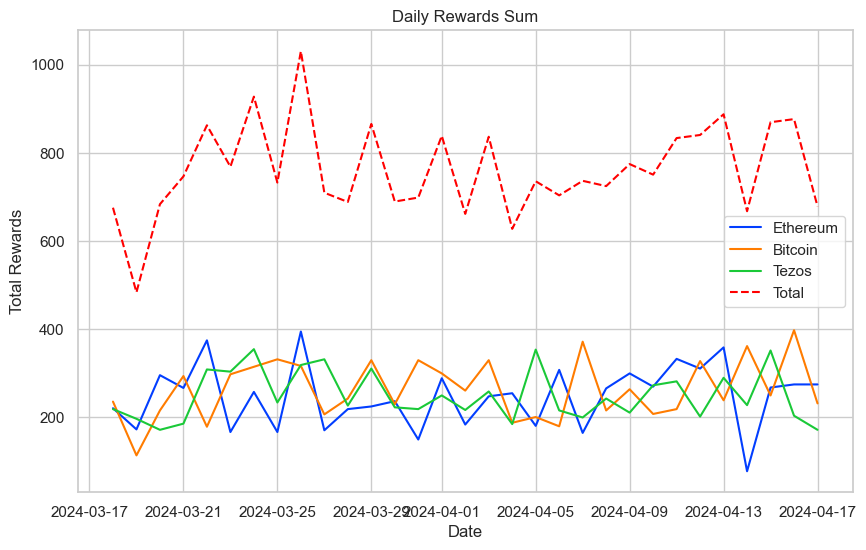

In [6]:
plot_daily_rewards(fake_data)

In [10]:
def sum_rewards_by_network(fake_data):
    network_sums = {}

    for network, user_rewards in fake_data.items():
        network_total = sum(sum(reward['reward'] for reward in rewards) for user_id, rewards in user_rewards.items())
        network_sums[network] = network_total

    return network_sums

In [8]:
def plot_rewards_pie(network_sums):
    # Extract network names and sums
    networks = list(network_sums.keys())
    sums = list(network_sums.values())

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sums, labels=networks, autopct='%1.1f%%', startangle=140)
    plt.title('Total Rewards by Network')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

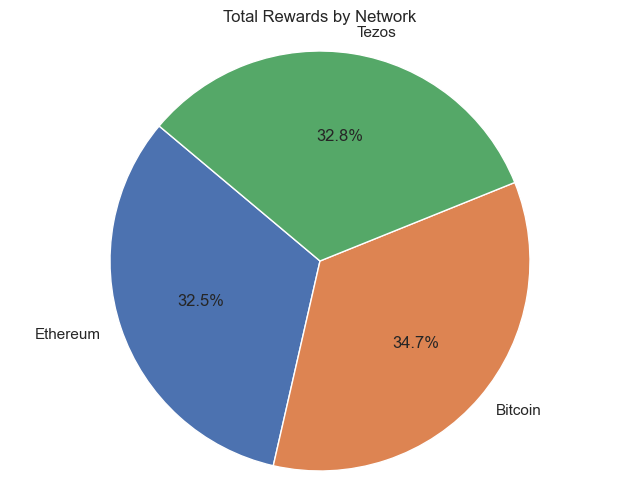

In [13]:
plot_rewards_pie(sum_rewards_by_network(fake_data))

In [18]:
import matplotlib.pyplot as plt

def sum_rewards_by_week(fake_data):
    weekly_sums = {}

    for network, user_rewards in fake_data.items():
        for user_id, rewards in user_rewards.items():
            for reward in rewards:
                year_week = reward['date'].isocalendar()[1]
                if network not in weekly_sums:
                    weekly_sums[network] = {}
                if year_week not in weekly_sums[network]:
                    weekly_sums[network][year_week] = 0
                weekly_sums[network][year_week] += reward['reward']

    return weekly_sums

def plot_weekly_rewards_bar(weekly_sums):
    if weekly_sums:
        networks = list(weekly_sums.keys())
        weeks = list(set(week for network_weeks in weekly_sums.values() for week in network_weeks.keys()))
        weeks.sort()
        num_weeks = len(weeks)

        # Prepare data for plotting
        network_data = {network: [weekly_sums[network].get(week, 0) for week in weeks] for network in networks}
        network_data['Total'] = [sum(weekly_sums[network].get(week, 0) for network in networks) for week in weeks]

        # Plot grouped bar chart
        bar_width = 0.35
        index = list(range(num_weeks))
        plt.figure(figsize=(12, 6))

        for i, network in enumerate(networks):
            plt.bar([idx + i * bar_width for idx in index], network_data[network], bar_width, label=network)

        plt.bar([idx + len(networks) * bar_width for idx in index], network_data['Total'], bar_width, label='Total', color='purple')

        plt.xlabel('Week')
        plt.ylabel('Total Rewards')
        plt.title('Weekly Rewards by Network')
        plt.xticks([idx + 0.5 * bar_width * len(networks) for idx in index], weeks)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No data to plot.")




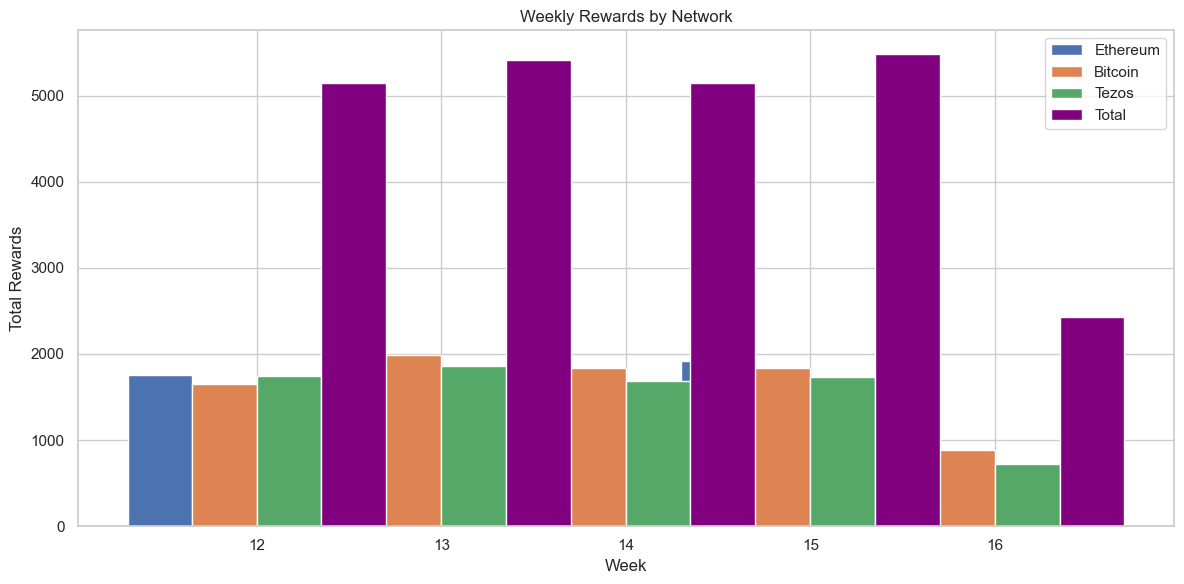

In [19]:
weekly_sums = sum_rewards_by_week(fake_data)
plot_weekly_rewards_bar(weekly_sums)